<a href="https://colab.research.google.com/github/chrisbmineiro/rede-neural-python/blob/main/rede_neural01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12718298.63it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 347528.84it/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3234982.61it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2581022.73it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



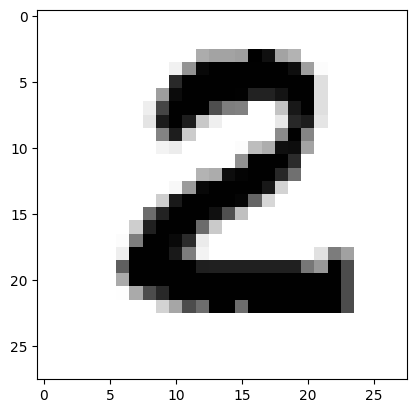

In [ ]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[2].numpy().squeeze(), cmap='gray_r')

In [ ]:
print(imagens[0].shape)
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(784, 128)
    self.linear2 = nn.Linear(128, 64)
    self.linear3 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return F.log_softmax(x, dim=1)

In [ ]:
def treino(modelo, trainloader, device):
  optimizer = optim.Adam(modelo.parameters(), lr=0.01, momentum=0.5)
  time_start = time()

  criterion = nn.NLLLoss()
  EPOCHS = 10
  modelo.train()

  for epoch in range(EPOCHS):
    running_loss = 0
    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens.shape[0], -1)
      optimizer.zero_grad()

      output = modelo(imagens.to(device))
      loss = criterion(output, etiquetas.to(device))
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    else:
        print("Epoch {} - Perda resultante: {}".format(epoch + 1, total_loss/len(trainloader)))
        print("\nTempo de treino (em minutos) = ", (time()-time_start)/60)


In [ ]:
def validacao(modelo, valloader, device):
  conta_certos, conta_totais = 0, 0
  for imagens, etiquetas in valloader:
    for i in range(len(imagens)):
      img = imagens[i].view(1, 784)
      with torch.no_grad():
        logps = modelo(img.to(device))

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_pred == etiqueta_certa):
        conta_certos += 1
      conta_totais += 1
  print("Total de imagens testadas: ", conta_totais)
  print("\nPrecisão do modelo: {}%" .format(conta_certos*100/conta_totais))

In [ ]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)